# Quadball game-state / logic test

In [1]:
# reload automatically when packages change: jupyter notebook only
%load_ext autoreload
%autoreload 2


In [2]:
# Section 1 — Imports & Test Utilities

import sys
import os
import time
import math
import json
from typing import Dict, Tuple, Optional

import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Small drawing helpers

def clamp(x, a, b):
    return max(a, min(b, x))

def draw_circle(ax, x, y, r=10, color='C0', alpha=0.9, fill=True, **kwargs):
    c = plt.Circle((x, y), r, color=color, alpha=alpha, fill=fill, **kwargs)
    ax.add_patch(c)

def draw_arrow(ax, x, y, dx, dy, color='k'):
    ax.arrow(x, y, dx, dy, head_width=8, head_length=8, fc=color, ec=color)

def pretty(s):
    print(json.dumps(s, indent=2))


In [3]:

class State:
    def __init__(self, x, y):
        self.x = x
        self.y = y

class Logic:
    def __init__(self, state):
        self.state = state

    def update(self, dt):
        self.state.x += 1 * dt
        self.state.y += 1 * dt
        print(f"Updated state: ({self.state.x:.2f}, {self.state.y:.2f})")

class MoreLogic:
    def __init__(self, logic):
        self.logic = logic
    
    def update(self, dt):
        self.logic.update(dt)
        print("More logic executed after update.")

state = State(0, 0)
logic = Logic(state)
more_logic = MoreLogic(logic)

logic.update(1)
more_logic.update(1)
logic.update(1)
more_logic.update(1)

Updated state: (1.00, 1.00)
Updated state: (2.00, 2.00)
More logic executed after update.
Updated state: (3.00, 3.00)
Updated state: (4.00, 4.00)
More logic executed after update.


In [5]:
# Section 2 — Adjust sys.path & Load Project Modules

# Ensure repo root is on sys.path so `quadball` package imports work when running the notebook
repo_root = os.path.abspath('.')  # notebook placed at repo root
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

print('repo_root:', repo_root)

# Try to import project modules
try:
    from core.game_state import GameState
    from core.entities import Player, DodgeBall, VolleyBall, Hoop, Vector2, PlayerRole, BallType
    from core.game_logic import GameLogic
    print('Imported quadball modules successfully')
except Exception as e:
    print('Failed to import quadball modules — make sure working directory is repo root or install package editable')
    raise


repo_root: c:\Users\peter\OneDrive\Q4A
Imported quadball modules successfully


In [4]:
for i in range(1, 2):
    print(i)

1


In [57]:
# Section 3 — Create Test GameState & GameLogicSystem

# Create a fresh GameState and GameLogicSystem for testing
state = GameState()
state.add_player(Player(id=1, team=0, position=Vector2(10, 10), velocity=Vector2(0, 0), role=PlayerRole.BEATER))
state.add_player(Player(id=2, team=0, position=Vector2(10, 20), velocity=Vector2(0, 0), role=PlayerRole.BEATER))
state.add_player(Player(id=3, team=1, position=Vector2(5, 15), velocity=Vector2(0, 0), role=PlayerRole.BEATER))
state.add_player(Player(id=4, team=1, position=Vector2(34, 7), velocity=Vector2(0, 0), role=PlayerRole.CHASER))
state.add_ball(DodgeBall(id=1, radius=0.1, position=Vector2(10, 10), velocity=Vector2(0, 0)))
state.add_ball(DodgeBall(id=2, radius=0.1, position=Vector2(10, 20), velocity=Vector2(0, 0)))
state.add_ball(DodgeBall(id=3, radius=0.1, position=Vector2(15, 15), velocity=Vector2(0, 0)))
state.add_ball(VolleyBall(id=4, radius=0.1, position=Vector2(30, 10), velocity=Vector2(0, 0)))

state.hoops = {
        'hoop_0_center': Hoop(id='hoop_0_center', team=0, position=Vector2(0, 15), radius=1.0),
        'hoop_1_center': Hoop(id='hoop_1_center', team=1, position=Vector2(40, 10), radius=1.0)
}

game_logic = GameLogic(state)


In [58]:
from computer_player.computer_player_utility import MovingEntityLineCrossStepRatioChecker, MoveAroundHoopBlockage
move_around_hoop_blockage = MoveAroundHoopBlockage(
    defence_hoops=[state.hoops['hoop_1_center']],
)
checker = MovingEntityLineCrossStepRatioChecker(
    game_logic, 
    dt=0.1,
    max_dt_steps=100,
    move_around_hoop_blockage=move_around_hoop_blockage,
    tol_reaching_target=1
    )
chaser = state.players[4]
volleyball = state.balls[4]
volleyball.velocity = Vector2(
    state.hoops['hoop_1_center'].position.x - volleyball.position.x,
    state.hoops['hoop_1_center'].position.y - volleyball.position.y
)
mag_vel = math.sqrt(volleyball.velocity.x**2 + volleyball.velocity.y**2)
if mag_vel > 1:
    volleyball.velocity.x /= mag_vel
    volleyball.velocity.y /= mag_vel

checker(
    volleyball,
    crossing_player_ids=[chaser.id],
    target_position=state.hoops['hoop_1_center'].position,
    only_first_crossing=False
)

[GAME] Player 1 picked up a dodgeball
[GAME] Player 2 picked up a dodgeball
[GAME] Third dodgeball 3 assigned to team 1
[GAME] Player 1 picked up a dodgeball
[GAME] Player 2 picked up a dodgeball
[GAME] Third dodgeball 3 assigned to team 1
[GAME] Player 1 picked up a dodgeball
[GAME] Player 2 picked up a dodgeball
[GAME] Third dodgeball 3 assigned to team 1
[GAME] Player 1 picked up a dodgeball
[GAME] Player 2 picked up a dodgeball
[GAME] Third dodgeball 3 assigned to team 1
[GAME] Player 1 picked up a dodgeball
[GAME] Player 2 picked up a dodgeball
[GAME] Third dodgeball 3 assigned to team 1
[GAME] Player 1 picked up a dodgeball
[GAME] Player 2 picked up a dodgeball
[GAME] Third dodgeball 3 assigned to team 1
[GAME] Player 1 picked up a dodgeball
[GAME] Player 2 picked up a dodgeball
[GAME] Third dodgeball 3 assigned to team 1
[GAME] Player 1 picked up a dodgeball
[GAME] Player 2 picked up a dodgeball
[GAME] Third dodgeball 3 assigned to team 1
[GAME] Player 1 picked up a dodgeball
[G

(0.9213483146067416, {4: 0.9213483146067416})

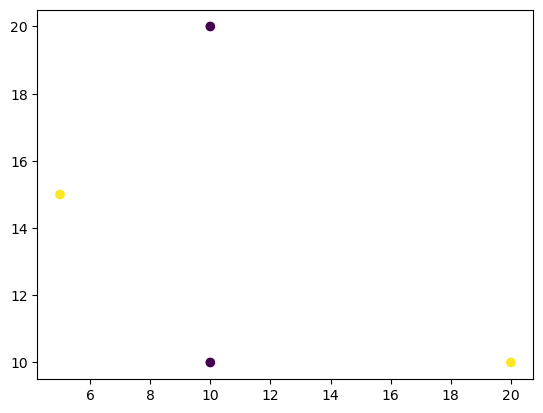

In [26]:
import matplotlib.pyplot as plt
player_positions = [player.position for player in state.players.values()]
player_teams = [player.team for player in state.players.values()]
player_roles = [player.role for player in state.players.values()]
plt.scatter([p.x for p in player_positions], [p.y for p in player_positions], c=player_teams, marker='o')

In [22]:
state.players.get(1).direction = Vector2(0, 0)
game_logic.process_throw_action(1)

False

In [36]:
state.balls.get(2).position=Vector2(10, 20)
game_logic.update(0.2)
print(state.third_dodgeball)
print('ball 1 position:', state.balls.get(1).position)
print('ball 3 position:', state.balls.get(3).position, 'holder id:', state.balls.get(3).holder_id, 'possession team:', state.balls.get(3).possession_team)
print('player 1 position:', state.players.get(1).position, 'holding ball:', state.players.get(1).has_ball)
print(state.balls.get(1).possession_team)
print('ball 1 holder:', state.balls.get(1).holder_id)
print('ball 1 beat attempt time:', state.balls.get(1).beat_attempt_time)
print('potential third dodgeball interference kwargs:', state.potential_third_dodgeball_interference_kwargs)
# print('player 1 position', state.players[1].position)
# print('player 2 position', state.players[2].position)
# print('player 1 velocity', state.players[1].velocity)
# print('player 2 velocity', state.players[2].velocity)

beat attempt time for dodgeball 1 4.400000000000002 / limit 10.0
{'hold_dodgeballs_0': [2], 'hold_dodgeballs_1': [], 'thrown_dodgeballs_0': [1], 'thrown_dodgeballs_1': [], 'dead_dodgeballs': [3]}
3
ball 1 position: Vector2(x=0.1, y=10.0)
ball 3 position: Vector2(x=10.2, y=10.2) holder id: None possession team: None
player 1 position: Vector2(x=10.0, y=10.0) holding ball: False
0
ball 1 holder: None
ball 1 beat attempt time: 4.400000000000002
potential third dodgeball interference kwargs: None


In [30]:
state.balls.get(3).position = Vector2(10.2, 10.2)

In [146]:
a = Vector2(10, 10)
n = Vector2(0.7, 0.7)
print(a.reflect(n, 0))

Vector2(x=-9.599999999999998, y=-9.599999999999998)


In [6]:
print(a.x * n.x + a.y * n.y)  # Dot product

10


## Test Copying of game state

In [20]:
from core.game_state import GameState
from core.game_logic.game_logic import GameLogic
from core.entities import Player, PlayerRole, Vector2, VolleyBall, DodgeBall, Hoop

# Build a deterministic but richer state (both teams, several roles, and dodgeballs)
original_state = GameState()

players = [
    # Team 0
    Player(id="t0_keeper", team=0, role=PlayerRole.KEEPER, position=Vector2(8.0, 16.0), direction=Vector2(0.2, 0.0), velocity=Vector2(0.5, 0.5)),
    Player(id="t0_chaser", team=0, role=PlayerRole.CHASER, position=Vector2(10.0, 10.0), direction=Vector2(1.0, 0.1)),
    Player(id="t0_beater", team=0, role=PlayerRole.BEATER, position=Vector2(12.0, 22.0), direction=Vector2(0.3, -0.2)),
    Player(id="t0_seeker", team=0, role=PlayerRole.SEEKER, position=Vector2(14.0, 7.0), direction=Vector2(0.1, 0.2)),
    # Team 1
    Player(id="t1_keeper", team=1, role=PlayerRole.KEEPER, position=Vector2(52.0, 16.0), direction=Vector2(-0.2, 0.0)),
    Player(id="t1_chaser", team=1, role=PlayerRole.CHASER, position=Vector2(48.0, 20.0), direction=Vector2(-1.0, -0.1)),
    Player(id="t1_beater", team=1, role=PlayerRole.BEATER, position=Vector2(46.0, 12.0), direction=Vector2(-0.3, 0.2)),
    Player(id="t1_seeker", team=1, role=PlayerRole.SEEKER, position=Vector2(44.0, 25.0), direction=Vector2(-0.1, -0.2)),
]
for player in players:
    original_state.add_player(player)

# Required by goal / knockout logic during GameLogic.update
original_state.hoops["hoop_0_center"] = Hoop(id="hoop_0_center", team=0, position=Vector2(19.0, 16.5), radius=1.0)
original_state.hoops["hoop_1_center"] = Hoop(id="hoop_1_center", team=1, position=Vector2(41.0, 16.5), radius=1.0)

# One volleyball + three dodgeballs
original_state.add_ball(VolleyBall(id="q1", radius=0.25, position=Vector2(30.0, 16.0), velocity=Vector2(0.0, 0.0)))
original_state.add_ball(DodgeBall(id="db1", radius=0.2, position=Vector2(24.0, 13.0), velocity=Vector2(0.2, 0.0), dead_velocity_threshold=0.05))
original_state.add_ball(DodgeBall(id="db2", radius=0.2, position=Vector2(30.0, 22.0), velocity=Vector2(-0.2, 0.0), dead_velocity_threshold=0.05))
original_state.add_ball(DodgeBall(id="db3", radius=0.2, position=Vector2(36.0, 12.0), velocity=Vector2(0.0, 0.2), dead_velocity_threshold=0.05))

# Snapshot key original values
original_game_time_before = original_state.game_time
original_t0_chaser_x_before = original_state.players["t0_chaser"].position.x
original_t0_chaser_y_before = original_state.players["t0_chaser"].position.y
original_db1_x_before = original_state.balls["db1"].position.x
original_db1_y_before = original_state.balls["db1"].position.y

# Copy and update only the copy
copied_state = original_state.copy()
copied_logic = GameLogic(copied_state)
copied_logic.update(1.0)

# Copy should change
assert copied_state.game_time > original_game_time_before
assert copied_state.players["t0_chaser"].position.x != original_t0_chaser_x_before or copied_state.players["t0_chaser"].position.y != original_t0_chaser_y_before

# Original must remain unchanged
assert original_state.game_time == original_game_time_before
assert original_state.players["t0_chaser"].position.x == original_t0_chaser_x_before
assert original_state.players["t0_chaser"].position.y == original_t0_chaser_y_before
assert original_state.balls["db1"].position.x == original_db1_x_before
assert original_state.balls["db1"].position.y == original_db1_y_before

print("PASS: Rich GameState copy (multi-role players + dodgeballs) updates independently of original_state.")

PASS: Rich GameState copy (multi-role players + dodgeballs) updates independently of original_state.
